In [1]:
#Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
#Loading the data

accept_data = pd.read_csv('LoanStats3a.csv', low_memory = False, skiprows=[0])

reject_data = pd.read_csv('RejectStatsA.csv', low_memory=False, skiprows=[0])

In [3]:
#Checking the data

accept_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
reject_data.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0


In [5]:
list(accept_data)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [6]:
#Confirming that policy code stands for whether or not someone gets the loan

print(accept_data['policy_code'].value_counts())
print(reject_data['Policy Code'].value_counts())

1.0    42535
Name: policy_code, dtype: int64
0    755491
Name: Policy Code, dtype: int64


In [7]:
#Looking at the column names

list(reject_data)

['Amount Requested',
 'Application Date',
 'Loan Title',
 'Risk_Score',
 'Debt-To-Income Ratio',
 'Zip Code',
 'State',
 'Employment Length',
 'Policy Code']

In [8]:
#After detecting the useful and matching columns we extract them from the data frames 
#and make the columns have the same titles

accept_data = accept_data[['loan_amnt', 'issue_d', 'dti', 'addr_state', 'emp_length', 'policy_code']]
reject_data = reject_data[['Amount Requested', 'Application Date', 'Debt-To-Income Ratio', 'State', 'Employment Length', 'Policy Code']]

accept_data.rename(index=str, inplace=True, columns={'loan_amnt': 'Amount Requested', 'issue_d': 'Application Date', 'dti': 'Debt-To-Income Ratio', 'addr_state': 'State', 'emp_length': 'Employment Length', 'policy_code': 'Policy Code'})

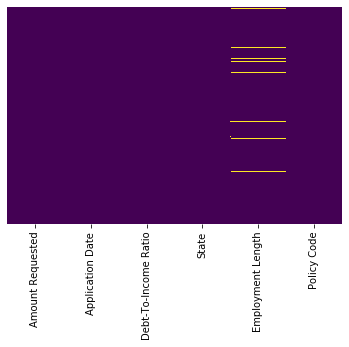

In [9]:
#With a heatmap looking at the null values. Since this is a very small portion of the data, 
# I end dropping those rows

sns.heatmap(accept_data.isna(), yticklabels=False, cbar=False, cmap='viridis')

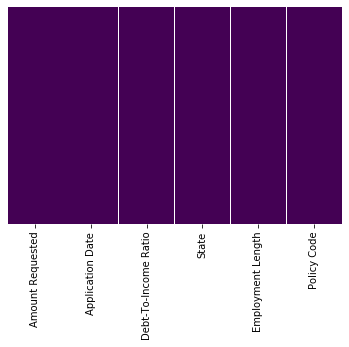

In [10]:
sns.heatmap(reject_data.isna(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
#Looking at the counts to see the null values numerically

accept_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42538 entries, 0 to 42537
Data columns (total 6 columns):
Amount Requested        42535 non-null float64
Application Date        42535 non-null object
Debt-To-Income Ratio    42535 non-null float64
State                   42535 non-null object
Employment Length       41423 non-null object
Policy Code             42535 non-null float64
dtypes: float64(3), object(3)
memory usage: 2.3+ MB


In [12]:
reject_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755491 entries, 0 to 755490
Data columns (total 6 columns):
Amount Requested        755491 non-null float64
Application Date        755491 non-null object
Debt-To-Income Ratio    755491 non-null object
State                   755470 non-null object
Employment Length       747361 non-null object
Policy Code             755491 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 34.6+ MB


In [13]:
accept_data[accept_data.isna() == 0].count()

Amount Requested        42535
Application Date        42535
Debt-To-Income Ratio    42535
State                   42535
Employment Length       41423
Policy Code             42535
dtype: int64

In [14]:
#Dropping the null rows from accept data

accept_data.dropna(inplace=True)

In [15]:
accept_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41423 entries, 0 to 42535
Data columns (total 6 columns):
Amount Requested        41423 non-null float64
Application Date        41423 non-null object
Debt-To-Income Ratio    41423 non-null float64
State                   41423 non-null object
Employment Length       41423 non-null object
Policy Code             41423 non-null float64
dtypes: float64(3), object(3)
memory usage: 2.2+ MB


In [16]:
#Dropping the null values from the reject data

reject_data.dropna(inplace=True)

In [17]:
reject_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747340 entries, 0 to 755490
Data columns (total 6 columns):
Amount Requested        747340 non-null float64
Application Date        747340 non-null object
Debt-To-Income Ratio    747340 non-null object
State                   747340 non-null object
Employment Length       747340 non-null object
Policy Code             747340 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 39.9+ MB


In [18]:
accept_data.head()

,Amount Requested,Application Date,Debt-To-Income Ratio,State,Employment Length,Policy Code
0,5000.0,Dec-2011,27.65,AZ,10+ years,1.0
1,2500.0,Dec-2011,1.00,GA,< 1 year,1.0
2,2400.0,Dec-2011,8.72,IL,10+ years,1.0
3,10000.0,Dec-2011,20.00,CA,10+ years,1.0
4,3000.0,Dec-2011,17.94,OR,1 year,1.0


In [19]:
#Converting the times to matching formats that the algorithm can read.
#I first turn them into numerical representations

from datetime import datetime as dt

accept_data['Application Date'] = list(map(lambda x: dt.strptime("01-" + str(x), '%d-%b-%Y'), accept_data['Application Date']))

In [20]:
accept_data.head(3)

,Amount Requested,Application Date,Debt-To-Income Ratio,State,Employment Length,Policy Code
0,5000.0,2011-12-01,27.65,AZ,10+ years,1.0
1,2500.0,2011-12-01,1.00,GA,< 1 year,1.0
2,2400.0,2011-12-01,8.72,IL,10+ years,1.0


In [21]:
#Even though the format matches I need to convert these into date format

reject_data['Application Date'] = list(map(lambda x: dt.strptime(x, '%Y-%m-%d'), reject_data['Application Date']))

In [22]:
reject_data.head(3)

,Amount Requested,Application Date,Debt-To-Income Ratio,State,Employment Length,Policy Code
0,1000.0,2007-05-26,10%,NM,4 years,0
1,1000.0,2007-05-26,10%,MA,< 1 year,0
2,11000.0,2007-05-27,10%,MD,1 year,0


In [23]:
#Removing the percent sign from the reject data

reject_data['Debt-To-Income Ratio'] = reject_data['Debt-To-Income Ratio'].apply(lambda x: float(x[:-1]))

In [24]:
reject_data.head(3)

,Amount Requested,Application Date,Debt-To-Income Ratio,State,Employment Length,Policy Code
0,1000.0,2007-05-26,10.0,NM,4 years,0
1,1000.0,2007-05-26,10.0,MA,< 1 year,0
2,11000.0,2007-05-27,10.0,MD,1 year,0


In [25]:
#Making sure these are floats and not strings

accept_data['Debt-To-Income Ratio'] = accept_data['Debt-To-Income Ratio'].apply(lambda x: float(x))
accept_data.head(3)

,Amount Requested,Application Date,Debt-To-Income Ratio,State,Employment Length,Policy Code
0,5000.0,2011-12-01,27.65,AZ,10+ years,1.0
1,2500.0,2011-12-01,1.00,GA,< 1 year,1.0
2,2400.0,2011-12-01,8.72,IL,10+ years,1.0


In [26]:
#I get dummies for the categorical variables states and employment duration 
#and add them to the data frames

states_a = pd.get_dummies(accept_data['State'], drop_first=True)
employment_length_a = pd.get_dummies(accept_data['Employment Length'], drop_first=True)
accept_data.drop(['State', 'Employment Length'], axis=1, inplace=True)
accept_data = pd.concat([accept_data, states_a, employment_length_a], axis=1)
accept_data.head()

,Amount Requested,Application Date,Debt-To-Income Ratio,Policy Code,AL,AR,AZ,CA,CO,CT,...,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
0,5000.0,2011-12-01,27.65,1.0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2500.0,2011-12-01,1.00,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2400.0,2011-12-01,8.72,1.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,10000.0,2011-12-01,20.00,1.0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3000.0,2011-12-01,17.94,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
states_r = pd.get_dummies(reject_data['State'], drop_first=True)
employment_length_r = pd.get_dummies(reject_data['Employment Length'], drop_first=True)
reject_data.drop(['State', 'Employment Length'], axis=1, inplace=True)
reject_data = pd.concat([reject_data, states_r, employment_length_r], axis=1)
reject_data.head()

,Amount Requested,Application Date,Debt-To-Income Ratio,Policy Code,AL,AR,AZ,CA,CO,CT,...,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
0,1000.0,2007-05-26,10.00,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1000.0,2007-05-26,10.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,11000.0,2007-05-27,10.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6000.0,2007-05-27,38.64,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1500.0,2007-05-27,9.43,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
accept_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41423 entries, 0 to 42535
Data columns (total 63 columns):
Amount Requested        41423 non-null float64
Application Date        41423 non-null datetime64[ns]
Debt-To-Income Ratio    41423 non-null float64
Policy Code             41423 non-null float64
AL                      41423 non-null uint8
AR                      41423 non-null uint8
AZ                      41423 non-null uint8
CA                      41423 non-null uint8
CO                      41423 non-null uint8
CT                      41423 non-null uint8
DC                      41423 non-null uint8
DE                      41423 non-null uint8
FL                      41423 non-null uint8
GA                      41423 non-null uint8
HI                      41423 non-null uint8
IA                      41423 non-null uint8
ID                      41423 non-null uint8
IL                      41423 non-null uint8
IN                      41423 non-null uint8
KS                      41

In [29]:
reject_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747340 entries, 0 to 755490
Data columns (total 64 columns):
Amount Requested        747340 non-null float64
Application Date        747340 non-null datetime64[ns]
Debt-To-Income Ratio    747340 non-null float64
Policy Code             747340 non-null int64
AL                      747340 non-null uint8
AR                      747340 non-null uint8
AZ                      747340 non-null uint8
CA                      747340 non-null uint8
CO                      747340 non-null uint8
CT                      747340 non-null uint8
DC                      747340 non-null uint8
DE                      747340 non-null uint8
FL                      747340 non-null uint8
GA                      747340 non-null uint8
HI                      747340 non-null uint8
IA                      747340 non-null uint8
ID                      747340 non-null uint8
IL                      747340 non-null uint8
IN                      747340 non-null uint8
KS

In [30]:
#I realized the accept data doesn't have any incidents of the state ND.
#I add it as a column of zeros

a=[0]*len(accept_data)
accept_data.insert(31, "ND", a, True)
accept_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41423 entries, 0 to 42535
Data columns (total 64 columns):
Amount Requested        41423 non-null float64
Application Date        41423 non-null datetime64[ns]
Debt-To-Income Ratio    41423 non-null float64
Policy Code             41423 non-null float64
AL                      41423 non-null uint8
AR                      41423 non-null uint8
AZ                      41423 non-null uint8
CA                      41423 non-null uint8
CO                      41423 non-null uint8
CT                      41423 non-null uint8
DC                      41423 non-null uint8
DE                      41423 non-null uint8
FL                      41423 non-null uint8
GA                      41423 non-null uint8
HI                      41423 non-null uint8
IA                      41423 non-null uint8
ID                      41423 non-null uint8
IL                      41423 non-null uint8
IN                      41423 non-null uint8
KS                      41

In [31]:
#Turning the dates into timestamps so that the algorithm can understand them

accept_data['Application Date'] = list(map(lambda x: int(round(x.timestamp())), accept_data['Application Date']))
reject_data['Application Date'] = list(map(lambda x: int(round(x.timestamp())), reject_data['Application Date']))
accept_data.head(3)

,Amount Requested,Application Date,Debt-To-Income Ratio,Policy Code,AL,AR,AZ,CA,CO,CT,...,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
0,5000.0,1322697600,27.65,1.0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2500.0,1322697600,1.00,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2400.0,1322697600,8.72,1.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [32]:
#Adding the two tables together

final_dataset = pd.concat([accept_data, reject_data], ignore_index=True)
target = final_dataset['Policy Code']
final_dataset = final_dataset.drop(['Policy Code'], axis=1)
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788763 entries, 0 to 788762
Data columns (total 63 columns):
Amount Requested        788763 non-null float64
Application Date        788763 non-null int64
Debt-To-Income Ratio    788763 non-null float64
AL                      788763 non-null uint8
AR                      788763 non-null uint8
AZ                      788763 non-null uint8
CA                      788763 non-null uint8
CO                      788763 non-null uint8
CT                      788763 non-null uint8
DC                      788763 non-null uint8
DE                      788763 non-null uint8
FL                      788763 non-null uint8
GA                      788763 non-null uint8
HI                      788763 non-null uint8
IA                      788763 non-null uint8
ID                      788763 non-null uint8
IL                      788763 non-null uint8
IN                      788763 non-null uint8
KS                      788763 non-null uint8
KY         

In [33]:
final_dataset.head()

,Amount Requested,Application Date,Debt-To-Income Ratio,AL,AR,AZ,CA,CO,CT,DC,...,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
0,5000.0,1322697600,27.65,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2500.0,1322697600,1.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2400.0,1322697600,8.72,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,10000.0,1322697600,20.00,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3000.0,1322697600,17.94,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
target.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Policy Code, dtype: float64

In [39]:
#I was going to use this but then I decided I would write my own function
'''from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
final_dataset = scaler.fit_transform(final_dataset)
final_dataset.info()'''

'from sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\nfinal_dataset = scaler.fit_transform(final_dataset)\nfinal_dataset.info()'

In [35]:
#I save the means and the stds. I'll need these later

m = final_dataset.mean()
sd = final_dataset.std()

In [36]:
#I define a function that does standardization

def standardize(A):
    m = A.mean()
    sd = A.std()
    
    return (A-m)/sd

In [37]:
#I standardize the whole dataset

final_dataset = standardize(final_dataset)

In [38]:
final_dataset.head()

,Amount Requested,Application Date,Debt-To-Income Ratio,AL,AR,AZ,CA,CO,CT,DC,...,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
0,-0.741343,0.325748,-0.014638,-0.13194,-0.110748,6.744886,-0.393401,-0.134606,-0.128451,-0.051803,...,3.941867,-0.201779,-0.180102,-0.15954,-0.153144,-0.132124,-0.113117,-0.107699,-0.095048,-1.662130
1,-0.978313,0.325748,-0.015091,-0.13194,-0.110748,-0.148260,-0.393401,-0.134606,-0.128451,-0.051803,...,-0.253687,-0.201779,-0.180102,-0.15954,-0.153144,-0.132124,-0.113117,-0.107699,-0.095048,0.601637
2,-0.987792,0.325748,-0.014960,-0.13194,-0.110748,-0.148260,-0.393401,-0.134606,-0.128451,-0.051803,...,3.941867,-0.201779,-0.180102,-0.15954,-0.153144,-0.132124,-0.113117,-0.107699,-0.095048,-1.662130
3,-0.267401,0.325748,-0.014768,-0.13194,-0.110748,-0.148260,2.541933,-0.134606,-0.128451,-0.051803,...,3.941867,-0.201779,-0.180102,-0.15954,-0.153144,-0.132124,-0.113117,-0.107699,-0.095048,-1.662130
4,-0.930919,0.325748,-0.014803,-0.13194,-0.110748,-0.148260,-0.393401,-0.134606,-0.128451,-0.051803,...,-0.253687,-0.201779,-0.180102,-0.15954,-0.153144,-0.132124,-0.113117,-0.107699,-0.095048,-1.662130


In [39]:
#Splitting into training and test data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(final_dataset, target, test_size=0.30)

In [40]:
#Importing the libraries for logistic regression and cross validation

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [ ]:
#Cross validating for the C parameter of the logistic regression

for i in range(1, 6):
    c = float(i)
    glm = LogisticRegression(C=c, solver='sag')
    glm.fit(X_train, Y_train)
    cv_scores = cross_val_score(glm, X_train, Y_train, cv=5)
    print('for C = ' + str(i) + ', cross validation score = ' + str(np.mean(cv_scores)))



In [41]:
#Since Cs didn't impact the performance I choose the lowest value
#I fit the model into a logistic regression and predict for the test data

glm = LogisticRegression(C=1.0, solver='sag')
glm.fit(X_train, Y_train)
pred = glm.predict(X_test)


/Users/Erkin/PycharmProjects/CS156Assignment2/venv/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [42]:
#Getting the accuracy metrics

from sklearn import metrics

#Accuracy
print('Accuracy: ', metrics.accuracy_score(Y_test, pred))

#Precision and recall
print('Precision: ', metrics.precision_score(Y_test, pred, average='micro'))
print('Recall: ', metrics.recall_score(Y_test, pred, average='micro'))

#Receiver Operating Characteristic (ROC)
print('ROC: ', metrics.roc_auc_score(Y_test, pred))

Accuracy:  0.947736752469055
Precision:  0.947736752469055
Recall:  0.947736752469055
ROC:  0.5


In [43]:
#Here I define a fuction that tries to guess the maximum amount of loan a person can take with the given stats.
#It doesn't work 

def predict_loan_status(date, dti, state, employment, confidence):
    #optimization starts from the lowest amount of loan one can take
    
    start_amount = -0.99
    
    #data is turned into the format that I can input the logistic regression
    state_list = ['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'ND', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT' ,'WA', 'WI', 'WV', 'WY']
    state_numbers = [0]*len(state_list)
    employment_year_list = ['10+ years', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '< 1 year']
    employment_numbers = [0]*len(employment_year_list)
    for i in range(0, len(state_list)):
        if state == state_list[i]:
            state_numbers[i] = 1
            break
    for i in range(0, len(employment_year_list)):
        if employment == employment_year_list[i]:
            employment_numbers[i] = 1
            break    
    input_data = [start_amount, date, dti]
    input_data = [input_data + state_numbers + employment_numbers]
    
    #I get the p-value from the logistic regression
    p = glm.predict_proba(input_data)[0]
    
    #I decide on a learning rate. This amount is added to the loan amount to test whether a person can still take the loan
    learn_rate = 0.05
    
    #If the person initially cannot take any loans we get this
    if p[0] <= confidence:
        print('Sorry but you should improve your stats before applying for a loan')
    else:
        #Imake a while loop that tries to constantly increase the loan amount as much as it can
        
        while (p[0] > confidence) and input_data[0][0] <= 1:
            input_data[0][0] = input_data[0][0] + learn_rate
            p = glm.predict_proba(input_data)[0]
            
        #Since the figures are standardized I destandardize them    
        amount = (sd[0]*(input_data[0][0]-0.05))+m[0]
        print('With ', p[0], ' confidence, you can apply for a loan of ', amount, ' dollars')

In [44]:
#Testing
predict_loan_status(-0.46763, -0.04465, 'AZ', '1 years', 0.90)

With  0.982664975535352  confidence, you can apply for a loan of  22948.878179462205  dollars
